In [1]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import Normalizer ,StandardScaler


## Load Dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#load submission file as well
sub = pd.read_csv('sub.csv')

In [3]:
#create a copy of the datasets 
testCopy = test.copy()
trainCopy = train.copy()

In [5]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
train.describe(include=['object'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [33]:
print("Missing values in % :\n",train.isnull().sum()/8523)

Missing values in % :
 Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

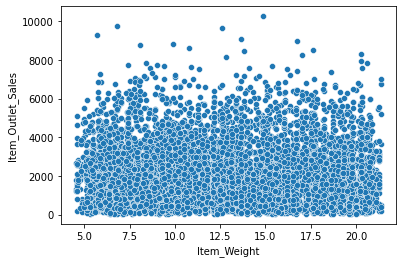

In [16]:
sns.scatterplot(data=train ,x="Item_Weight",y="Item_Outlet_Sales")

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

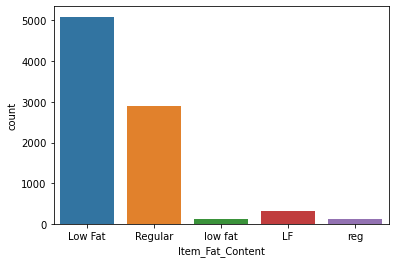

In [18]:
sns.countplot(x="Item_Fat_Content",data=train)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

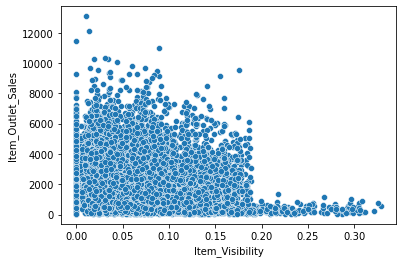

In [19]:
sns.scatterplot(data=train ,x="Item_Visibility",y="Item_Outlet_Sales")

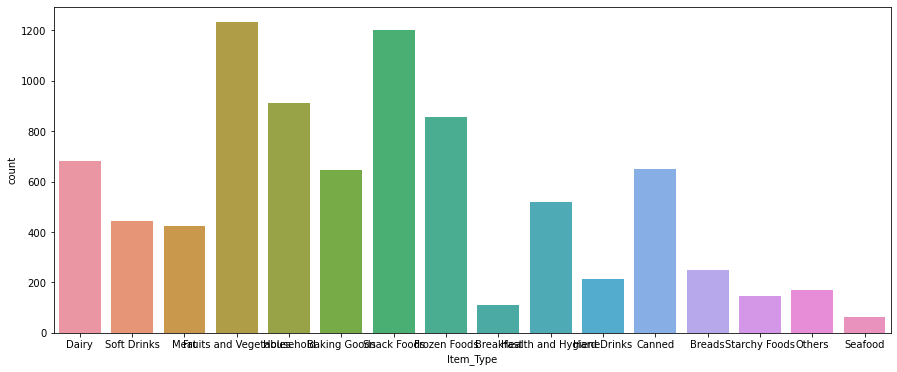

In [23]:
plt.figure(figsize=(15,6))
ax =sns.countplot(x="Item_Type",data=train)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

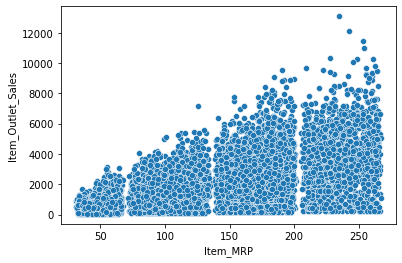

In [24]:
sns.scatterplot(data=train ,x="Item_MRP",y="Item_Outlet_Sales")

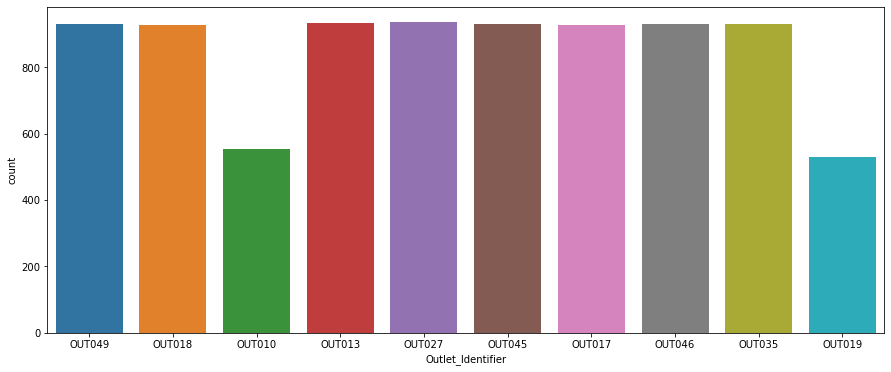

In [26]:
plt.figure(figsize=(15,6))

ax=sns.countplot(x="Outlet_Identifier",data=train)

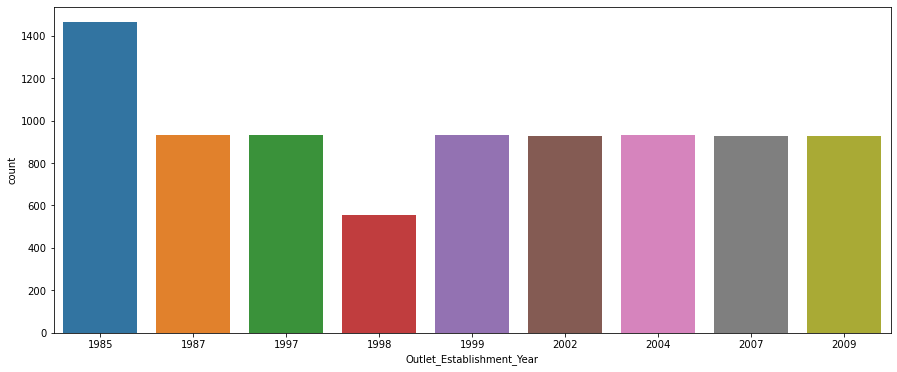

In [27]:
plt.figure(figsize=(15,6))

ax=sns.countplot(x="Outlet_Establishment_Year",data=train)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

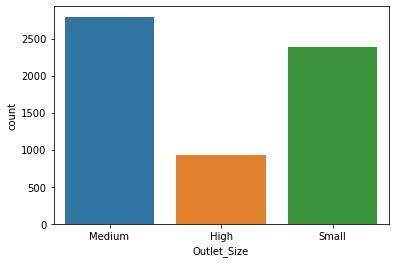

In [29]:
sns.countplot(x="Outlet_Size",data=train)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

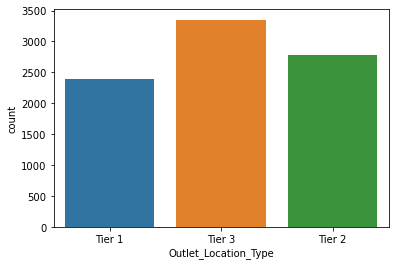

In [30]:
sns.countplot(x="Outlet_Location_Type",data=train)

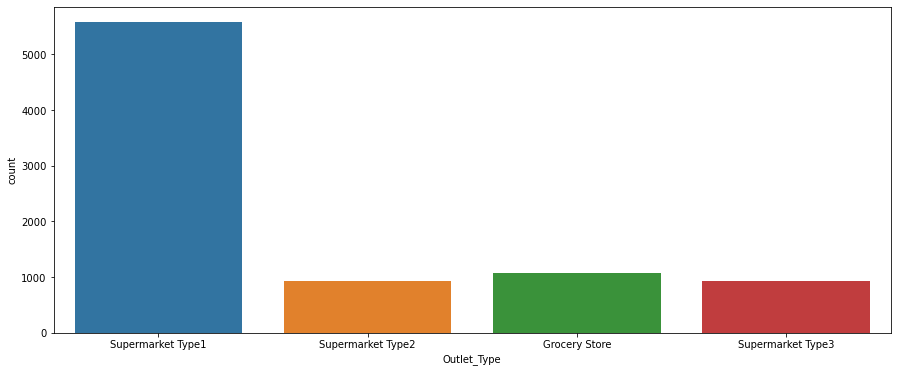

In [32]:
plt.figure(figsize=(15,6))

ax=sns.countplot(x="Outlet_Type",data=train)

In [13]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

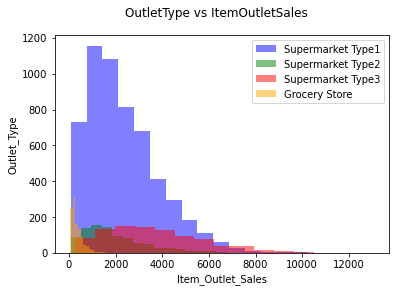

In [36]:
#Dealing with numerical vs categorical variables 
#Outlet_Type

fig, ax = plt.subplots()

ax.hist(train[train["Outlet_Type"]== "Supermarket Type1"]["Item_Outlet_Sales"], bins=15, alpha=0.5,
        color="blue", label="Supermarket Type1")
ax.hist(train[train["Outlet_Type"]== "Supermarket Type2"]["Item_Outlet_Sales"], bins=15, alpha=0.5,
        color="green", label="Supermarket Type2")
ax.hist(train[train["Outlet_Type"]== "Supermarket Type3"]["Item_Outlet_Sales"], bins=15, alpha=0.5,
        color="red", label="Supermarket Type3")
ax.hist(train[train["Outlet_Type"]== "Grocery Store"]["Item_Outlet_Sales"], bins=15, alpha=0.5,
        color="orange", label="Grocery Store")

ax.set_xlabel("Item_Outlet_Sales")
ax.set_ylabel("Outlet_Type")

fig.suptitle("OutletType vs ItemOutletSales")

ax.legend();

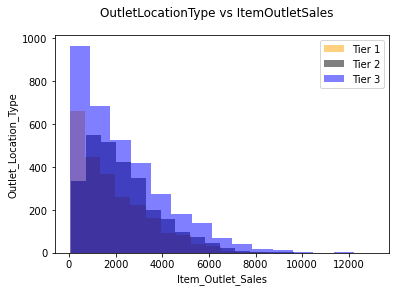

In [40]:
#OutletLocationType
#Dealing with numerical vs categorical variables 
#Outlet_Type

fig, ax = plt.subplots()

ax.hist(train[train["Outlet_Location_Type"]== "Tier 1"]["Item_Outlet_Sales"], bins=15, alpha=0.5,
        color="orange", label="Tier 1")
ax.hist(train[train["Outlet_Location_Type"]== "Tier 2"]["Item_Outlet_Sales"], bins=15, alpha=0.5,
        color="black", label="Tier 2")
ax.hist(train[train["Outlet_Location_Type"]== "Tier 3"]["Item_Outlet_Sales"], bins=15, alpha=0.5,
        color="blue", label="Tier 3")

ax.set_xlabel("Item_Outlet_Sales")
ax.set_ylabel("Outlet_Location_Type")

fig.suptitle("OutletLocationType vs ItemOutletSales")

ax.legend();

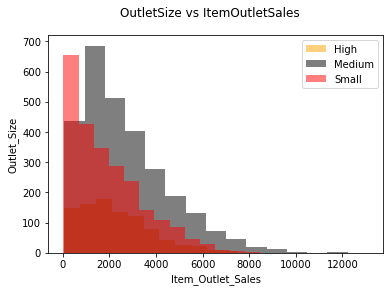

In [42]:
#OutletSize
#Dealing with numerical vs categorical variables 
#Outlet_Type

fig, ax = plt.subplots()

ax.hist(train[train["Outlet_Size"]== "High"]["Item_Outlet_Sales"], bins=15, alpha=0.5,
        color="orange", label="High")
ax.hist(train[train["Outlet_Size"]== "Medium"]["Item_Outlet_Sales"], bins=15, alpha=0.5,
        color="black", label="Medium")
ax.hist(train[train["Outlet_Size"]== "Small"]["Item_Outlet_Sales"], bins=15, alpha=0.5,
        color="red", label="Small")

ax.set_xlabel("Item_Outlet_Sales")
ax.set_ylabel("Outlet_Size")

fig.suptitle("OutletSize vs ItemOutletSales")

ax.legend();

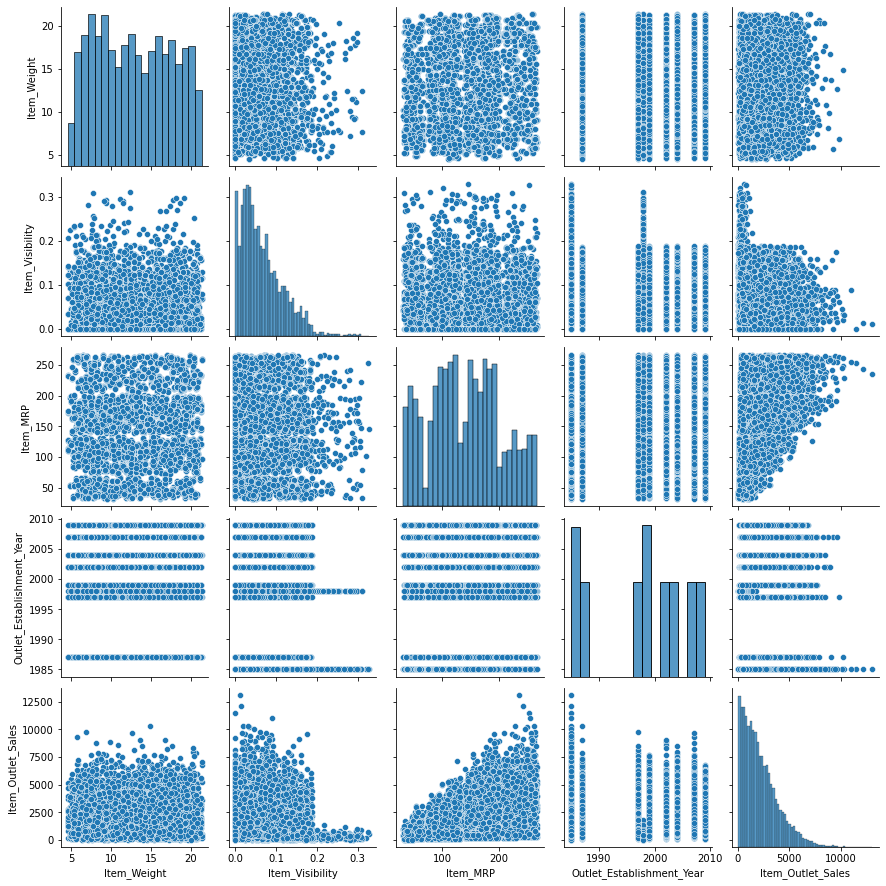

In [45]:
sns.pairplot(train)

In [46]:
train['Stallyr'] = 2013 - train['Outlet_Establishment_Year']
test['Stallyr'] = 2013 - test['Outlet_Establishment_Year']

In [49]:
train.Item_Visibility.median()

0.05393093400000001

In [50]:
test.Item_Visibility.median()

0.054154252

In [52]:
train.Item_Visibility.replace(to_replace = 0.000000, value =0.05393093400000001 , inplace=True) 

test.Item_Visibility.replace(to_replace = 0.000000, value =0.054154252,inplace=True) 

In [57]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [56]:
train.Item_Fat_Content.replace(to_replace =['LF','low fat'], value='Low Fat',inplace=True)
train.Item_Fat_Content.replace(to_replace ='reg',value='Regular',inplace=True)

test.Item_Fat_Content.replace(to_replace =['LF','low fat'], value='Low Fat',inplace=True)
test.Item_Fat_Content.replace(to_replace ='reg',value='Regular',inplace=True)



In [60]:
train.Outlet_Size.isnull().sum()

2410

In [63]:
train.Item_Type.value_counts()

Foods                 1997
Perishables           1345
Fresh Produce         1232
Bread and Bakery      1009
Household              910
Milk and Dairy         682
Drinks                 659
Health and Hygiene     520
Others                 169
Name: Item_Type, dtype: int64

In [62]:
train.Item_Type.replace(to_replace =['Dairy'], value='Milk and Dairy',inplace=True)
train.Item_Type.replace(to_replace =['Fruits and Vegetables'], value='Fresh Produce',inplace=True)
train.Item_Type.replace(to_replace =['Seafood','Meat','Frozen Foods'], value='Perishables',inplace=True)
train.Item_Type.replace(to_replace =['Soft Drinks','Hard Drinks'], value='Drinks',inplace=True)
train.Item_Type.replace(to_replace =['Breads','Baking Goods','Breakfast'], value='Bread and Bakery',inplace=True)
train.Item_Type.replace(to_replace =['Starchy Foods','Canned','Snack Foods'], value='Foods',inplace=True)



test.Item_Type.replace(to_replace =['Dairy'], value='Milk and Dairy',inplace=True)
test.Item_Type.replace(to_replace =['Fruits and Vegetables'], value='Fresh Produce',inplace=True)
test.Item_Type.replace(to_replace =['Seafood','Meat','Frozen Foods'], value='Perishables',inplace=True)
test.Item_Type.replace(to_replace =['Soft Drinks','Hard Drinks'], value='Drinks',inplace=True)
test.Item_Type.replace(to_replace =['Breads','Baking Goods','Breakfast'], value='Bread and Bakery',inplace=True)
test.Item_Type.replace(to_replace =['Starchy Foods','Canned','Snack Foods'], value='Foods',inplace=True)

In [67]:
# replace missing values 
# impute missing values in item weight by mean
train.Item_Weight.fillna(train.Item_Weight.mean(),inplace=True)
# impute outlet size in training data by mode
train.Outlet_Size.fillna(train.Outlet_Size.mode()[0],inplace=True)

test.Item_Weight.fillna(train.Item_Weight.mean(),inplace=True)
test.Outlet_Size.fillna(train.Outlet_Size.mode()[0],inplace=True)

In [71]:
train.Item_Weight = train.Item_Weight.round(2)
test.Item_Weight = test.Item_Weight.round(2)


train.Item_MRP = train.Item_MRP.round(2)
test.Item_MRP = test.Item_MRP.round(2)


train.Item_Outlet_Sales = train.Item_Outlet_Sales.round(2)

In [77]:
train.Item_Visibility = train.Item_Visibility.round(3)
test.Item_Visibility =test.Item_Visibility.round(3)

In [79]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Stallyr
0,FDW58,20.75,Low Fat,0.008,Foods,107.86,OUT049,1999,Medium,Tier 1,Supermarket Type1,14
1,FDW14,8.30,Regular,0.038,Milk and Dairy,87.32,OUT017,2007,Medium,Tier 2,Supermarket Type1,6
2,NCN55,14.60,Low Fat,0.100,Others,241.75,OUT010,1998,Medium,Tier 3,Grocery Store,15
3,FDQ58,7.32,Low Fat,0.015,Foods,155.03,OUT017,2007,Medium,Tier 2,Supermarket Type1,6
4,FDY38,12.86,Regular,0.119,Milk and Dairy,234.23,OUT027,1985,Medium,Tier 3,Supermarket Type3,28


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

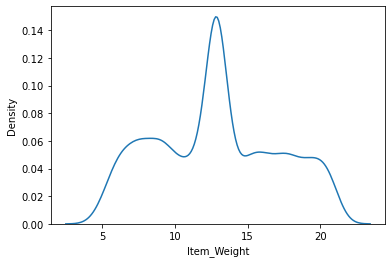

In [81]:
#lets look at the distribution of the dataset
sns.kdeplot(data=train, x="Item_Weight")

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

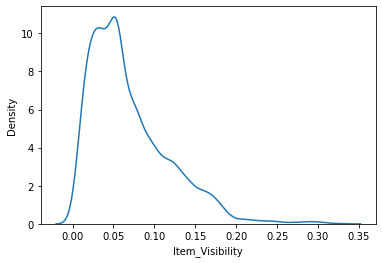

In [82]:
sns.kdeplot(data=train, x="Item_Visibility")

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

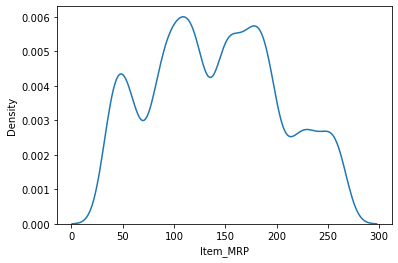

In [83]:
sns.kdeplot(data=train, x="Item_MRP")

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

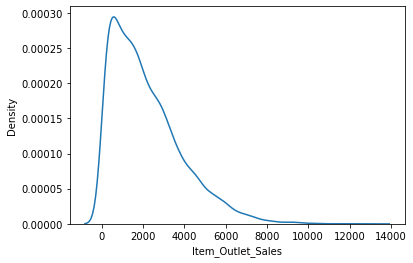

In [84]:
sns.kdeplot(data=train, x="Item_Outlet_Sales")

<AxesSubplot:xlabel='Item_Weight'>

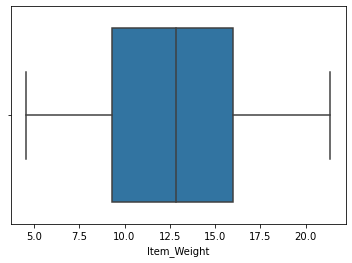

In [85]:
#check for outliers
sns.boxplot(data=train, x="Item_Weight")

<AxesSubplot:xlabel='Item_Visibility'>

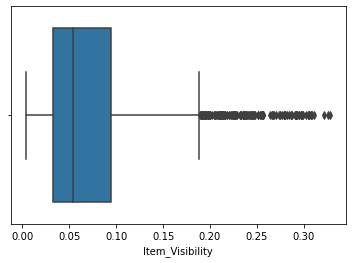

In [86]:
sns.boxplot(data=train, x="Item_Visibility")

<AxesSubplot:xlabel='Item_MRP'>

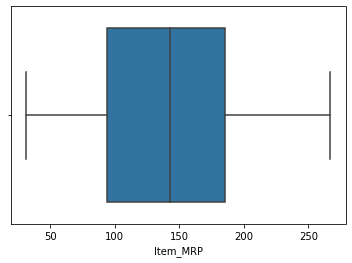

In [87]:
sns.boxplot(data=train, x="Item_MRP")

<AxesSubplot:xlabel='Item_Outlet_Sales'>

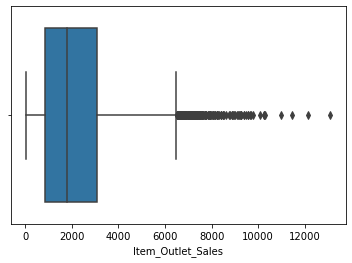

In [88]:
sns.boxplot(data=train, x="Item_Outlet_Sales")

In [90]:
print(train.Item_Visibility.quantile(0.90))
print(train.Item_Visibility.quantile(0.10))
print(train.Item_Visibility.mode())

0.1398000000000002
0.019
0    0.054
dtype: float64


In [91]:
print(test.Item_Visibility.quantile(0.90))
print(test.Item_Visibility.quantile(0.10))
print(test.Item_Visibility.mode())

0.136
0.019
0    0.054
dtype: float64


In [92]:
print(train.Item_Outlet_Sales.quantile(0.90))
print(train.Item_Outlet_Sales.quantile(0.10))
print(train.Item_Outlet_Sales.mode())

4570.05
343.55
0    958.75
dtype: float64


In [93]:
# let us get rid of these outliers for both test and train 
# Item visibility and Item_Outlet_Sales
train['Item_Visibility']=np.where(train['Item_Visibility']>0.1398000000000002, 0.054,train['Item_Visibility'])

test['Item_Visibility']=np.where(test['Item_Visibility']>0.136, 0.054,test['Item_Visibility'])


train['Item_Outlet_Sales']=np.where(train['Item_Outlet_Sales']>4570.05,958.75,train['Item_Outlet_Sales'])

<AxesSubplot:>

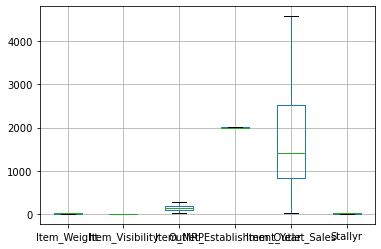

In [102]:
train.boxplot()

In [103]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Stallyr
0,FDA15,9.30,Low Fat,0.016,Milk and Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14,14
1,DRC01,5.92,Regular,0.019,Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42,4
2,FDN15,17.50,Low Fat,0.017,Perishables,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27,14
3,FDX07,19.20,Regular,0.054,Fresh Produce,182.10,OUT010,1998,Medium,Tier 3,Grocery Store,732.38,15
4,NCD19,8.93,Low Fat,0.054,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71,26


In [104]:
#separate 
itemID = train['Item_Identifier']
outletID = train['Outlet_Identifier']

itemOutletSales = train['Item_Outlet_Sales']



testitemID = test['Item_Identifier']
testoutletID = test['Outlet_Identifier']




X= train.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis=1)

y= itemOutletSales

In [110]:
testr = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [140]:
y.dtypes

dtype('float64')

In [145]:
X = pd.get_dummies(X)
testr = pd.get_dummies(testr)

In [157]:
normalizer = Normalizer()
X= normalizer.fit_transform(X)
testr = normalizer.transform(testr)

In [158]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 23)

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from xgboost import XGBRegressor 
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor 

from sklearn.metrics import mean_squared_error



lnr = LinearRegression()
rfr = RandomForestRegressor()
dtr = DecisionTreeRegressor()
xgbr = XGBRegressor()
knn = KNeighborsRegressor()
lgbr = lgb.LGBMRegressor()
cbr = CatBoostRegressor()


estimators =[
             ('Linear Regression',lnr),
             ('RandomForest Regressor',rfr),
             ('DecisionTree Regressor',dtr),
             ('XGBRegressor',xgbr),
             ('KNeighborsRegressor',knn),
             ('LGBMRegressor',lgbr),
             ('CatBoostRegressor',cbr)]

In [160]:
def model_training(X_train,X_test,y_train,y_test):
    for e,r in estimators:
        r.fit(X_train,y_train)
        r_preds = r.predict(X_test)
        print("*****************************************************")
        print("RMSE for {} is :".format(e),mean_squared_error(y_test,r_preds))
        print("*****************************************************")
        print("RMSE for {} is :".format(e),np.sqrt(mean_squared_error(y_test,r_preds)))
        print("\n")
        

In [161]:
model_training(X_train,X_test,y_train,y_test)

*****************************************************
RMSE for Linear Regression is : 835129.8497879358
*****************************************************
RMSE for Linear Regression is : 913.854392005606


*****************************************************
RMSE for RandomForest Regressor is : 860543.224782273
*****************************************************
RMSE for RandomForest Regressor is : 927.6546904868605


*****************************************************
RMSE for DecisionTree Regressor is : 1632426.2145441056
*****************************************************
RMSE for DecisionTree Regressor is : 1277.6643591116197


*****************************************************
RMSE for XGBRegressor is : 918272.9822196857
*****************************************************
RMSE for XGBRegressor is : 958.265611518897


*****************************************************
RMSE for KNeighborsRegressor is : 983010.5730809243
*********************************************

133:	learn: 854.7611922	total: 2.04s	remaining: 13.2s
134:	learn: 854.4170246	total: 2.06s	remaining: 13.2s
135:	learn: 854.1076794	total: 2.07s	remaining: 13.2s
136:	learn: 853.7544953	total: 2.09s	remaining: 13.1s
137:	learn: 853.6075858	total: 2.1s	remaining: 13.1s
138:	learn: 853.3772805	total: 2.12s	remaining: 13.1s
139:	learn: 853.2473735	total: 2.13s	remaining: 13.1s
140:	learn: 853.0330374	total: 2.15s	remaining: 13.1s
141:	learn: 852.7313800	total: 2.16s	remaining: 13s
142:	learn: 852.5191535	total: 2.17s	remaining: 13s
143:	learn: 852.1740868	total: 2.19s	remaining: 13s
144:	learn: 851.8781463	total: 2.21s	remaining: 13s
145:	learn: 851.6844685	total: 2.22s	remaining: 13s
146:	learn: 851.4478459	total: 2.23s	remaining: 13s
147:	learn: 851.2205784	total: 2.25s	remaining: 12.9s
148:	learn: 851.0428279	total: 2.26s	remaining: 12.9s
149:	learn: 850.9006546	total: 2.28s	remaining: 12.9s
150:	learn: 850.7685713	total: 2.29s	remaining: 12.9s
151:	learn: 850.5795926	total: 2.31s	rema

293:	learn: 814.8497391	total: 4.41s	remaining: 10.6s
294:	learn: 814.6903838	total: 4.43s	remaining: 10.6s
295:	learn: 814.3119409	total: 4.45s	remaining: 10.6s
296:	learn: 813.9781283	total: 4.46s	remaining: 10.6s
297:	learn: 813.8343428	total: 4.47s	remaining: 10.5s
298:	learn: 813.7359620	total: 4.49s	remaining: 10.5s
299:	learn: 813.6609805	total: 4.5s	remaining: 10.5s
300:	learn: 813.2300075	total: 4.52s	remaining: 10.5s
301:	learn: 813.0460453	total: 4.53s	remaining: 10.5s
302:	learn: 812.8491040	total: 4.55s	remaining: 10.5s
303:	learn: 812.6824217	total: 4.56s	remaining: 10.4s
304:	learn: 812.4541722	total: 4.58s	remaining: 10.4s
305:	learn: 812.2373092	total: 4.59s	remaining: 10.4s
306:	learn: 812.0210141	total: 4.61s	remaining: 10.4s
307:	learn: 811.9418726	total: 4.62s	remaining: 10.4s
308:	learn: 811.8278608	total: 4.64s	remaining: 10.4s
309:	learn: 811.5755297	total: 4.65s	remaining: 10.4s
310:	learn: 811.5046639	total: 4.67s	remaining: 10.3s
311:	learn: 811.3078656	total

454:	learn: 782.8944698	total: 6.8s	remaining: 8.14s
455:	learn: 782.8227135	total: 6.81s	remaining: 8.13s
456:	learn: 782.5523160	total: 6.83s	remaining: 8.11s
457:	learn: 782.2368258	total: 6.84s	remaining: 8.1s
458:	learn: 781.9516157	total: 6.86s	remaining: 8.08s
459:	learn: 781.6960401	total: 6.87s	remaining: 8.07s
460:	learn: 781.4755451	total: 6.89s	remaining: 8.05s
461:	learn: 781.3510387	total: 6.9s	remaining: 8.04s
462:	learn: 781.2302815	total: 6.92s	remaining: 8.02s
463:	learn: 781.1000475	total: 6.93s	remaining: 8s
464:	learn: 780.9526366	total: 6.94s	remaining: 7.99s
465:	learn: 780.8300145	total: 6.96s	remaining: 7.97s
466:	learn: 780.8085745	total: 6.97s	remaining: 7.96s
467:	learn: 780.7111071	total: 6.99s	remaining: 7.94s
468:	learn: 780.6367551	total: 7s	remaining: 7.93s
469:	learn: 780.3326773	total: 7.02s	remaining: 7.91s
470:	learn: 779.9594939	total: 7.03s	remaining: 7.9s
471:	learn: 779.8462486	total: 7.05s	remaining: 7.89s
472:	learn: 779.7955607	total: 7.06s	r

612:	learn: 757.5033644	total: 9.15s	remaining: 5.77s
613:	learn: 757.2129155	total: 9.16s	remaining: 5.76s
614:	learn: 757.1232187	total: 9.18s	remaining: 5.75s
615:	learn: 756.7780816	total: 9.19s	remaining: 5.73s
616:	learn: 756.6081984	total: 9.21s	remaining: 5.71s
617:	learn: 756.5924868	total: 9.22s	remaining: 5.7s
618:	learn: 756.5498389	total: 9.24s	remaining: 5.69s
619:	learn: 756.4618136	total: 9.26s	remaining: 5.67s
620:	learn: 756.3525834	total: 9.27s	remaining: 5.66s
621:	learn: 756.2306133	total: 9.29s	remaining: 5.64s
622:	learn: 756.0532219	total: 9.3s	remaining: 5.63s
623:	learn: 755.9970684	total: 9.31s	remaining: 5.61s
624:	learn: 755.7949930	total: 9.33s	remaining: 5.6s
625:	learn: 755.7344493	total: 9.35s	remaining: 5.58s
626:	learn: 755.5795281	total: 9.36s	remaining: 5.57s
627:	learn: 755.3547260	total: 9.38s	remaining: 5.55s
628:	learn: 755.2488701	total: 9.39s	remaining: 5.54s
629:	learn: 755.0943456	total: 9.41s	remaining: 5.53s
630:	learn: 754.9362354	total: 

770:	learn: 735.3549091	total: 11.5s	remaining: 3.42s
771:	learn: 735.2835935	total: 11.6s	remaining: 3.41s
772:	learn: 735.2582118	total: 11.6s	remaining: 3.4s
773:	learn: 735.1521801	total: 11.6s	remaining: 3.38s
774:	learn: 735.1239386	total: 11.6s	remaining: 3.37s
775:	learn: 734.9354280	total: 11.6s	remaining: 3.35s
776:	learn: 734.9130637	total: 11.6s	remaining: 3.33s
777:	learn: 734.7537157	total: 11.6s	remaining: 3.32s
778:	learn: 734.6178813	total: 11.7s	remaining: 3.31s
779:	learn: 734.4726392	total: 11.7s	remaining: 3.29s
780:	learn: 734.2632549	total: 11.7s	remaining: 3.27s
781:	learn: 734.0875580	total: 11.7s	remaining: 3.26s
782:	learn: 733.9063730	total: 11.7s	remaining: 3.25s
783:	learn: 733.8386249	total: 11.7s	remaining: 3.23s
784:	learn: 733.5540907	total: 11.7s	remaining: 3.21s
785:	learn: 733.4816538	total: 11.8s	remaining: 3.2s
786:	learn: 733.4573484	total: 11.8s	remaining: 3.19s
787:	learn: 733.2913708	total: 11.8s	remaining: 3.17s
788:	learn: 733.2022474	total:

928:	learn: 716.1644497	total: 13.9s	remaining: 1.06s
929:	learn: 716.1270734	total: 13.9s	remaining: 1.05s
930:	learn: 716.1226593	total: 13.9s	remaining: 1.03s
931:	learn: 715.9871124	total: 13.9s	remaining: 1.02s
932:	learn: 715.8446112	total: 13.9s	remaining: 1s
933:	learn: 715.7620709	total: 14s	remaining: 986ms
934:	learn: 715.5502134	total: 14s	remaining: 971ms
935:	learn: 715.4288382	total: 14s	remaining: 956ms
936:	learn: 715.3902204	total: 14s	remaining: 941ms
937:	learn: 715.2627329	total: 14s	remaining: 926ms
938:	learn: 715.1461550	total: 14s	remaining: 911ms
939:	learn: 714.9602444	total: 14s	remaining: 896ms
940:	learn: 714.7107091	total: 14.1s	remaining: 881ms
941:	learn: 714.6045513	total: 14.1s	remaining: 866ms
942:	learn: 714.4118115	total: 14.1s	remaining: 852ms
943:	learn: 714.2150169	total: 14.1s	remaining: 837ms
944:	learn: 714.1061563	total: 14.1s	remaining: 822ms
945:	learn: 714.0320234	total: 14.1s	remaining: 807ms
946:	learn: 713.9432818	total: 14.1s	remainin

In [171]:
lpreds =lgbr.predict(testr)

In [172]:
sub.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [173]:
#convert the predictions to pandas dataframe
submission = pd.DataFrame(data={'Item_Identifier':testitemID,'Outlet_Identifier':testoutletID,'Item_Outlet_Sales':lpreds})

submission.to_csv('Submission.csv',index=False)



In [174]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1777.886973
1,FDW14,OUT017,1268.269047
2,NCN55,OUT010,665.141935
3,FDQ58,OUT017,2486.532016
4,FDY38,OUT027,1364.699084
